In [130]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import datetime
import numpy as np 

userStock = input("Enter a ticker symbol: ")

stock_data = pd.read_csv("dow_jones_index/dow_jones_index.csv", parse_dates=["date"])
stock_data["day_of_year"] = stock_data["date"].dt.dayofyear
stock_data["close"] = stock_data["close"].str[1:]
stock_data["close"] = stock_data["close"].astype('float')


In [131]:
training_data = stock_data[stock_data["stock"] == userStock][0:19]
testing_data = stock_data[stock_data["stock"] == userStock][20:25]

X_train = training_data[["day_of_year"]]
y_train = training_data["close"]
X_test = testing_data[["day_of_year"]]

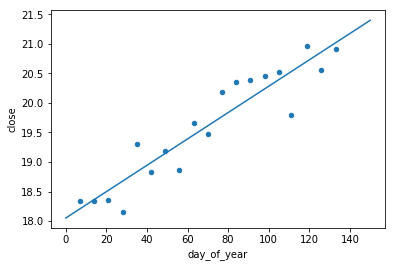

In [132]:
stockModel = LinearRegression()
stockModel.fit(
    X=X_train,
    y=y_train
)
stockModel.predict(
    X=X_test
)

X_new_stock = pd.DataFrame()
X_new_stock["day_of_year"]= np.linspace(0,150, num=7)

y_new_stock = pd.Series(
    stockModel.predict(X_new_stock),
    index=X_new_stock["day_of_year"]
)

training_data.plot.scatter(x="day_of_year", y="close")
y_new_stock.plot.line()

In [133]:
print("The slope of the linear regression is: " , stockModel.coef_[0])
print("The intercept of the linear regession is: ", stockModel.intercept_)

The slope of the linear regression is:  0.022303058825308267
The intercept of the linear regession is:  18.052064990587645


In [134]:
stockModel2 = LinearRegression()

stockModel2.fit(
    X=training_data[["day_of_year"]],
    y=training_data["close"]
)

stock_predict = pd.DataFrame({"day_of_year": [180]})
ans = stockModel2.predict(
    X=stock_predict[["day_of_year"]]
)

print(ans[0])

22.066615579143132


In [135]:
# Pearson Test: Figure out which stock is growing the fastest during the two quarters 
stock_AA = stock_data[stock_data["stock"] == "AA"]

timeVsPrice = pd.crosstab(stock_AA["day_of_year"], stock_AA["close"])

print(timeVsPrice)




close        14.72  15.23  15.28  15.79  15.92  15.97  16.03  16.11  16.13  \
day_of_year                                                                  
7                0      0      0      0      0      0      0      0      0   
14               0      0      0      0      0      1      0      0      0   
21               0      0      0      1      0      0      0      0      0   
28               0      0      0      0      0      0      0      0      1   
35               0      0      0      0      0      0      0      0      0   
42               0      0      0      0      0      0      0      0      0   
49               0      0      0      0      0      0      0      0      0   
56               0      0      0      0      0      0      0      0      0   
63               0      0      0      0      0      0      0      0      0   
70               0      0      0      0      0      0      1      0      0   
77               0      0      0      0      0      0      0    